Esse código usa o banco de dados do Censo Estado Unidense, que contem 14 parâmetros (como idade, grau de educação, sexo, nacionalidade) de 32561 pessoas que moram nos EUA. O objetivo do modelo é classificar corretamente a pessoa em questão recebe ou não mais de $50.000 anualmente baseada nos parametros da Base de dados.

This code aims to train a model using the Random Forest algorithm and a US census Database, which has 14 different parameters (like age, education, sex, nationality) of the 32561 people living in USA. The model's goal is to classify correctly if the person earns more or less than 50k annually based on the Database features.

Importando as bibliotecas:

Importing the libraries:

In [107]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



Carregando a Base de Dados:

Loading the Database:
    

In [108]:

data = pd.read_csv('adult01.csv')



A Base de dados possui algumas colunas que devem ser transformadas em números inteiros, por isso é necessário importar e usar o Label Encoder:

The Database has some columns that needs to be labelled as integer numbers, for this reason it is necessary to import and use a Label Encoder:


In [109]:

label = LabelEncoder()



Uma vez que os dados foram rotulados, a variável alvo (que é a informação sobre a pessoa ganhar ou não mais que $50.000 no ano) é definida:

Once the Dataframe had been labelled, the target (that is the information about whether or not the person earns more than $50,000 a year) is defined:


In [110]:

target = label.fit_transform(data.iloc[:,14])



Algumas colunas devem ser transformadas em matrizes. O Label Encoder vai ordenar numéricamente colunas que não ordenáveis, para isso o OneHotEncoder é necessário:

Some columns must be transformed into matrixes. The Label Encoder will order numeric columns which are not ordenable, for this the OneHotEncoder is needed:


In [111]:

columntransformer = make_column_transformer(
    (OneHotEncoder(), ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'sex', 'race', 'native-country']), 
    remainder = 'passthrough')
predictors = columntransformer.fit_transform(data.iloc[:,0:14])
predictors = predictors.toarray()



Os preditores precisam ser escalonados devido à grande diferença entre as variáveis em cada coluna:

The predictors need to be staggered because of the large difference between the variables in each column:


In [112]:

scaler = StandardScaler()
predictors = scaler.fit_transform(predictors)



O alvo e os preditores são separados nos dados de treinamento e de teste (tamanho do teste = 20%):

The target and the predictors are both separated in training and testing data (test size = 20%):


In [113]:

predictors_test, predictors_train, target_test, target_train = train_test_split(predictors, target, test_size=0.2)



Uma vez que os dados estão corretamente modelados e divididos, o Classificador Random Forest é importado, no qual as Bases de Dados de treino (preditoras e alvo) são aplicadas, usando o número de 40 'árvores na floresta':

Once the data is correctly modelled the Random Forest Classifier is imported, in which the training data (predictors and targets) are fitted in, using 40 as the number of &#39;trees in the forest&#39;:


In [114]:

classifier = RandomForestClassifier(n_estimators=40, criterion="entropy",random_state=0)
classifier.fit(predictors_train, target_train)
predictions = classifier.predict(predictors_test)



Para se medir a precisão do modelo, é necessário comparar as previsões feitas por ele, usando o predictors_test, e compará-lo com o target_test:


In order to measure how accurate the model is, it needs to compare the predictions made by it, using the predictors_test, and compare it with the target_test:


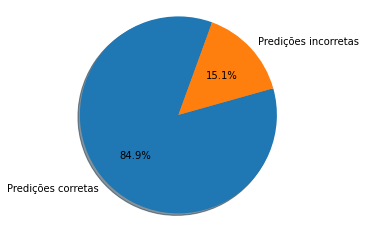

In [115]:

accuracy = accuracy_score(predictions, target_test)
labels = 'Predições corretas', 'Predições incorretas'
sizes = [accuracy, 1-accuracy] 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, shadow=True, startangle=70, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()



In [ ]:

A precisão do modelo é por volta de 84,9%.

The accuracy of the model is about 84,9%.